## Activity 2.01

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("wholesale_customers_data.csv")

In [3]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
outliers = {}
for i in range(data.shape[1]):
    min_t = data[data.columns[i]].mean() - (3 * data[data.columns[i]].std())
    max_t = data[data.columns[i]].mean() + (3 * data[data.columns[i]].std())
    count = 0
    for j in data[data.columns[i]]:
        if j < min_t or j > max_t:
            count += 1
    outliers[data.columns[i]] = [count,data.shape[0]-count]
print(outliers)

{'Channel': [0, 440], 'Region': [0, 440], 'Fresh': [7, 433], 'Milk': [9, 431], 'Grocery': [7, 433], 'Frozen': [6, 434], 'Detergents_Paper': [10, 430], 'Delicassen': [4, 436]}


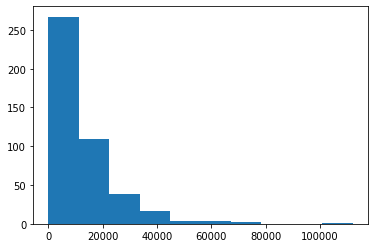

In [5]:
plt.hist(data["Fresh"])
plt.show()

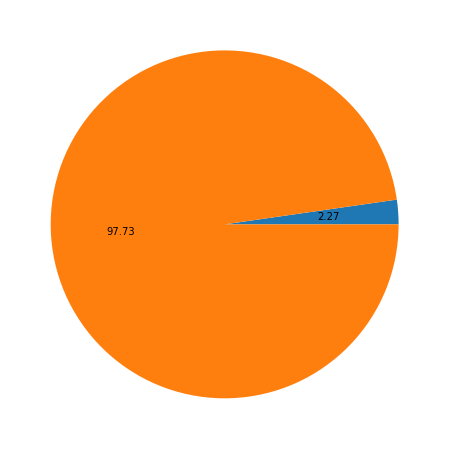

In [6]:
plt.figure(figsize=(8,8))
plt.pie(outliers["Detergents_Paper"],autopct="%.2f")
plt.show()

In [7]:
data_standardized = (data - data.mean())/data.std()
data_standardized.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.447005,0.589997,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,1.447005,0.589997,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,1.447005,0.589997,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,-0.689512,0.589997,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,1.447005,0.589997,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870


## Activity 2.02

In [8]:
from sklearn.cluster import KMeans

In [9]:
ideal_k = []
for i in range(1,21):
    est_kmeans = KMeans(n_clusters=i, random_state = 0)
    est_kmeans.fit(data_standardized)
    
    ideal_k.append([i,est_kmeans.inertia_])

In [10]:
ideal_k = np.array(ideal_k)

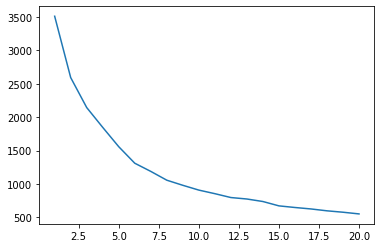

In [11]:
plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.show()

A number of 6 cluster was selected

In [12]:
est_kmeans = KMeans(n_clusters=6, random_state = 0)
est_kmeans.fit(data_standardized)
pred_kmeans = est_kmeans.predict(data_standardized)

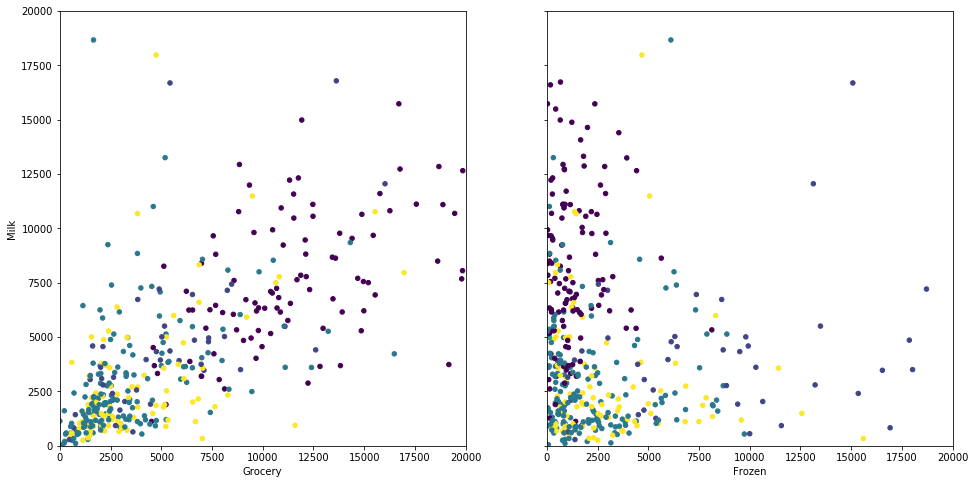

In [13]:
plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16,8))
plt.scatter(data.iloc[:,5], data.iloc[:,3], c=pred_kmeans, s=20)
plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Frozen')
plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:,4], data.iloc[:,3], c=pred_kmeans, s=20)
plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

## Activity 2.03

In [14]:
from sklearn.cluster import MeanShift

In [15]:
est_meanshift = MeanShift(0.4)
est_meanshift.fit(data_standardized)
pred_meanshift = est_meanshift.predict(data_standardized)

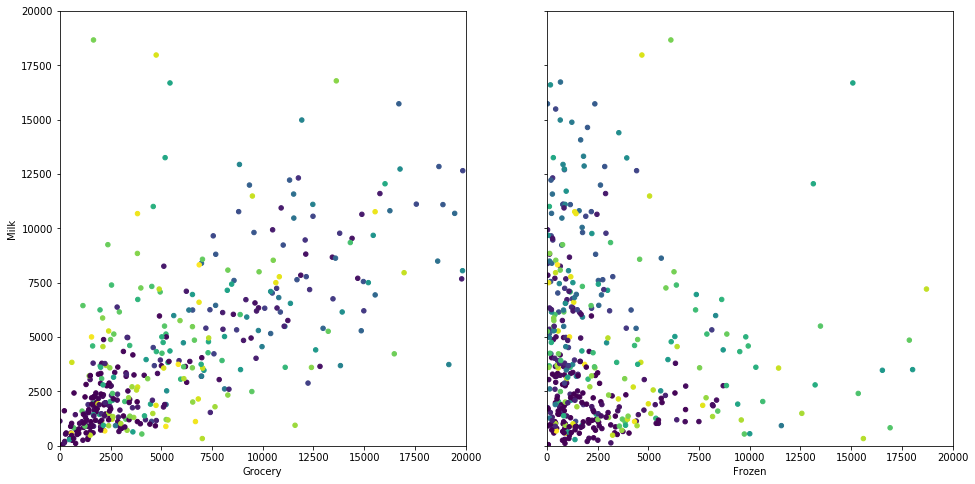

In [16]:
plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16,8))
plt.scatter(data.iloc[:,5], data.iloc[:,3], c=pred_meanshift, s=20)
plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Frozen')
plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:,4], data.iloc[:,3], c=pred_meanshift, s=20)
plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

## Activity 2.04

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
est_dbscan = DBSCAN(eps=0.8)
pred_dbscan = est_dbscan.fit_predict(data_standardized)

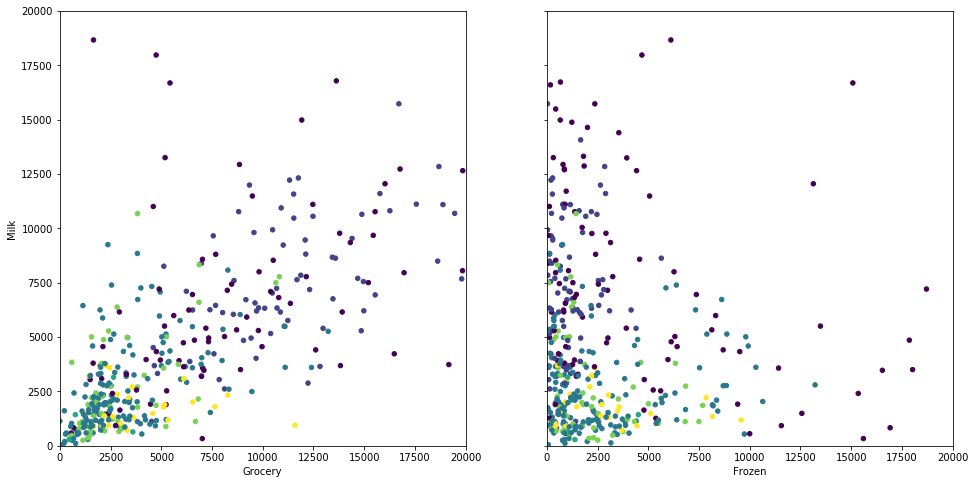

In [19]:
plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16,8))
plt.scatter(data.iloc[:,5], data.iloc[:,3], c=pred_dbscan, s=20)
plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Frozen')
plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:,4], data.iloc[:,3], c=pred_dbscan, s=20)
plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()